#1.&nbsp; Set Environment

##1.1 Load Library

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import shapiro
import warnings
from google.colab import drive

import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme()

warnings.filterwarnings("ignore")

##1.2 Load Dataset

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to dataset
MIMIC_DB = '/content/drive/MyDrive/MIMIC-III/Dataset'

In [ ]:
df_demo = pd.read_csv(MIMIC_DB + '/StrokeDemographic.csv', index_col=0)
df_cbc = pd.read_csv(MIMIC_DB + '/LabCBC.csv', index_col=0)
df_chem = pd.read_csv(MIMIC_DB + '/LabChem.csv', index_col=0)
df_clinic = pd.read_csv(MIMIC_DB + '/ItemClinical.csv', index_col=0)

#2.&nbsp; Change Columns

In [ ]:
# Rename columns
df_final_alive = df_final_alive.rename(columns={"icu_length_of_stay": "ICU LOS"})

##2.1 CBC

In [ ]:
df_cbc.head()

,hadm_id,lab_name,value
subject_id,,,
9635,167449,Lymphocytes,11.6
2184,171742,Hematocrit,45.3
13715,156530,INR(PT),1.2
12539,177675,PTT,37.1
64192,160781,Hemoglobin,11.3


In [ ]:
df_cbc_reset = df_cbc.reset_index()
cbc_edit = df_cbc_reset.pivot(index=['subject_id', 'hadm_id'], columns='lab_name', values='value')
cbc_edit.head()

,lab_name,Hematocrit,Hemoglobin,INR(PT),Lymphocytes,Neutrophils,PT,PTT,Platelet Count,White Blood Cells
subject_id,hadm_id,,,,,,,,,
9,150750,37.6,12.9,1.1,41.6,50.1,13.0,23.3,306.0,14.4
31,128652,30.0,11.0,1.2,12.4,80.1,13.0,31.0,149.0,12.0
55,190665,30.9,10.4,NaN,NaN,NaN,NaN,NaN,208.0,6.9
67,155252,54.1,18.4,1.2,12.1,83.2,13.2,35.5,183.0,9.3
81,175016,32.6,10.2,1.1,22.9,62.6,13.1,23.6,307.0,10.1


In [ ]:
cbc_edit = cbc_edit.reset_index()
print(cbc_edit['subject_id'].nunique())
print(cbc_edit['hadm_id'].nunique())
print(cbc_edit.shape)

4211
4407
(4407, 11)


##2.2 Clinical Chemistry

In [ ]:
df_chem.head()

,hadm_id,lab_name,value
subject_id,,,
50480,107202,Albumin,3.7
16037,150134,Alanine Aminotransferase (ALT),11.0
78101,177078,Glucose,192.0
14079,112805,Lactate,1.0
78229,117839,Chloride,108.0


In [ ]:
df_chem_reset = df_chem.reset_index()
chem_edit = df_chem_reset.pivot(index=['subject_id', 'hadm_id'], columns='lab_name', values='value')
chem_edit.head()

,lab_name,% Hemoglobin A1c,Alanine Aminotransferase (ALT),Albumin,Alkaline Phosphatase,Asparate Aminotransferase (AST),Bicarbonate,"Bilirubin, Total",Chloride,"Cholesterol, LDL, Calculated","Cholesterol, Total","Creatinine, Serum",Glucose,Lactate,Potassium,Sodium,Triglycerides,Urea Nitrogen
subject_id,hadm_id,,,,,,,,,,,,,,,,,
9,150750,5.6,14.0,2.9,67.0,12.0,30.0,0.4,103.0,141.0,208.0,NaN,143.0,2.7,3.6,137.0,94.0,17.0
31,128652,NaN,38.0,2.2,178.0,41.0,21.0,1.0,104.0,NaN,NaN,NaN,138.0,1.5,3.7,134.0,NaN,40.0
55,190665,NaN,NaN,NaN,NaN,NaN,27.0,NaN,109.0,NaN,NaN,NaN,106.0,NaN,4.9,143.0,NaN,15.0
67,155252,NaN,NaN,NaN,NaN,NaN,20.0,NaN,100.0,NaN,NaN,NaN,176.0,NaN,5.1,137.0,NaN,24.0
81,175016,NaN,23.0,4.0,68.0,43.0,22.0,0.5,102.0,104.0,216.0,NaN,123.0,NaN,4.5,128.0,69.0,11.0


In [ ]:
chem_edit = chem_edit.reset_index()
print(chem_edit['subject_id'].nunique())
print(chem_edit['hadm_id'].nunique())
print(chem_edit.shape)

4211
4407
(4407, 19)


##2.3 Clinical Info

In [ ]:
df_clinic.head()

,hadm_id,item_name,value
subject_id,,,
44288,125243,Non Invasive Blood Pressure systolic,151.0
41546,127506,GCS - Eye Opening,4.0
86383,113964,Heart Rate,81.0
91379,138965,O2 saturation pulseoxymetry,95.0
92201,165561,Heart Rate,70.0


In [ ]:
df_clinic_reset = df_clinic.reset_index()
clinic_edit = df_clinic_reset.pivot(index=['subject_id', 'hadm_id'], columns='item_name', values='value')
clinic_edit.head()

,item_name,Admission Weight (Kg),GCS - Eye Opening,GCS - Motor Response,GCS - Verbal Response,Heart Rate,Non Invasive Blood Pressure diastolic,Non Invasive Blood Pressure systolic,O2 saturation pulseoxymetry,Spont RR,Temperature Celsius
subject_id,hadm_id,,,,,,,,,,
222,103002,72.2,4.0,6.0,5.0,71.0,57.0,99.0,99.0,NaN,NaN
249,149546,76.5,3.0,6.0,5.0,107.0,74.0,109.0,95.0,16.0,NaN
266,186251,61.0,4.0,6.0,1.0,76.0,66.0,134.0,100.0,22.0,NaN
384,122988,44.9,3.0,5.0,2.0,90.0,82.0,155.0,94.0,NaN,NaN
502,116367,84.7,4.0,1.0,1.0,114.0,95.0,138.0,99.0,18.0,36.5


In [ ]:
clinic_edit = clinic_edit.reset_index()
print(clinic_edit['subject_id'].nunique())
print(clinic_edit['hadm_id'].nunique())
print(clinic_edit.shape)

2013
2096
(2096, 12)


#3.&nbsp; Join with Demographic Data

In [ ]:
df_demo = df_demo.reset_index()

# Set 'subject_id' and 'hadm_id' as multi-indices for each DataFrame
cbc_edit.set_index(['subject_id', 'hadm_id'], inplace=True)
chem_edit.set_index(['subject_id', 'hadm_id'], inplace=True)
clinic_edit.set_index(['subject_id', 'hadm_id'], inplace=True)
df_demo.set_index(['subject_id', 'hadm_id'], inplace=True)

# Perform the joins, df_demo being the leftmost DataFrame
df_merged = df_demo.join([cbc_edit, chem_edit, clinic_edit], how='left')

In [ ]:
df_merged.reset_index(inplace=True)

print(df_demo.shape)
print(df_merged.shape)

(5523, 13)
(5523, 51)


#4.&nbsp; Check Missing Values & Outliers

In [ ]:
print(df_merged.isnull().mean().round(4) * 100)

subject_id                                0.00
hadm_id                                   0.00
icustay_id                                0.00
icd9_code                                 0.00
icd9_code_description                     0.00
time_from_er_to_icu                       0.00
admission_type                            0.00
ventilator_status                         0.00
age_group                                 0.00
previous_stroke_admission                 0.00
gender                                    0.00
ethnicity_grouped                         0.00
mortality                                 0.00
insurance                                 0.00
icu_length_of_stay                        0.00
Hematocrit                                0.72
Hemoglobin                                0.89
INR(PT)                                   1.96
Lymphocytes                              19.28
Neutrophils                              19.28
PT                                        2.01
PTT          

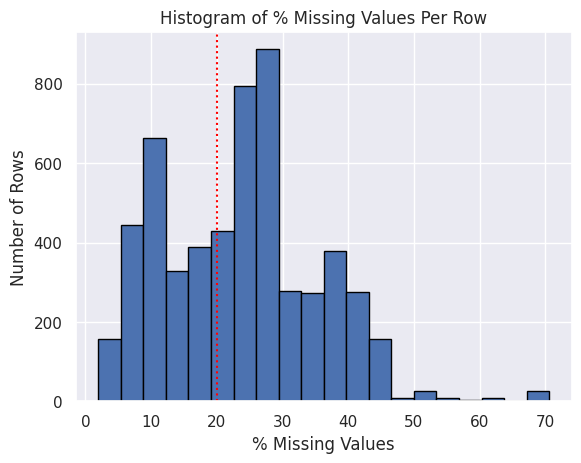

In [ ]:
# Calculate the percentage of missing values in each row
missing_values_row = df_merged.isna().mean(axis=1).round(4) * 100

# Plot a histogram of the missing value percentages
plt.hist(missing_values_row, bins=20, edgecolor='black')
plt.axvline(x=20, color='red', linestyle='dotted')
plt.title('Histogram of % Missing Values Per Row')
plt.xlabel('% Missing Values')
plt.ylabel('Number of Rows')
plt.show()

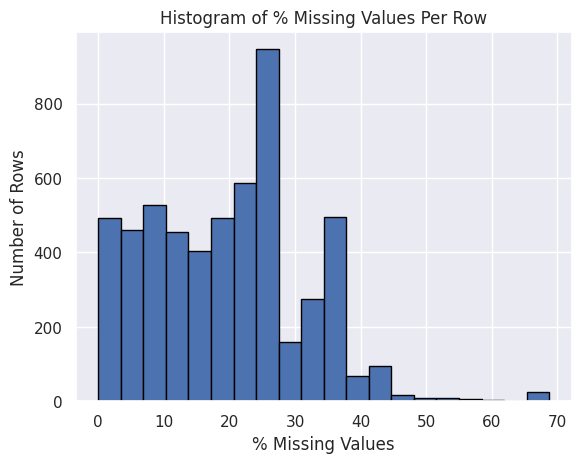

In [ ]:
#Remove some columns that has >80% mising value
df_merged_1 = df_merged.drop(['Temperature Celsius', 'Spont RR', 'Creatinine, Serum'], axis=1)

# Calculate the percentage of missing values in each row
missing_values_row = df_merged_1.isna().mean(axis=1).round(4) * 100

# Plot a histogram of the missing value percentages
plt.hist(missing_values_row, bins=20, edgecolor='black')
plt.title('Histogram of % Missing Values Per Row')
plt.xlabel('% Missing Values')
plt.ylabel('Number of Rows')
plt.show()

In [ ]:
#Remove some rows that has >20% mising value
# Calculate the percentage of missing values in each row
missing_values_row = df_merged_1.isna().mean(axis=1)

# Create a mask for rows with >20% missing values
mask = missing_values_row <= 0.20

# Use the mask to filter the DataFrame
df_merged_2 = df_merged_1.loc[mask]
df_merged_2.shape

(2832, 48)

In [ ]:
#Recheck with columns

print(df_merged_2.isnull().mean().round(4) * 100)

subject_id                                0.00
hadm_id                                   0.00
icustay_id                                0.00
icd9_code                                 0.00
icd9_code_description                     0.00
time_from_er_to_icu                       0.00
admission_type                            0.00
ventilator_status                         0.00
age_group                                 0.00
previous_stroke_admission                 0.00
gender                                    0.00
ethnicity_grouped                         0.00
mortality                                 0.00
insurance                                 0.00
icu_length_of_stay                        0.00
Hematocrit                                0.00
Hemoglobin                                0.00
INR(PT)                                   0.49
Lymphocytes                              13.28
Neutrophils                              13.28
PT                                        0.46
PTT          

In [ ]:
#Remove some more columns that has >20% mising value
df_final = df_merged_2.drop(['Triglycerides', 'Cholesterol, LDL, Calculated',
                             'Cholesterol, Total', 'Bilirubin, Total',
                             'Albumin', '% Hemoglobin A1c', 'Lactate' ], axis=1)

print(df_final.shape)
print(df_final['subject_id'].nunique())
print(df_final['hadm_id'].nunique())
print(df_final['icustay_id'].nunique())

(2832, 41)
2083
2154
2154


In [ ]:
df_final.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'icd9_code',
       'icd9_code_description', 'time_from_er_to_icu', 'admission_type',
       'ventilator_status', 'age_group', 'previous_stroke_admission', 'gender',
       'ethnicity_grouped', 'mortality', 'insurance', 'icu_length_of_stay',
       'Hematocrit', 'Hemoglobin', 'INR(PT)', 'Lymphocytes', 'Neutrophils',
       'PT', 'PTT', 'Platelet Count', 'White Blood Cells',
       'Alanine Aminotransferase (ALT)', 'Alkaline Phosphatase',
       'Asparate Aminotransferase (AST)', 'Bicarbonate', 'Chloride', 'Glucose',
       'Potassium', 'Sodium', 'Urea Nitrogen', 'Admission Weight (Kg)',
       'GCS - Eye Opening', 'GCS - Motor Response', 'GCS - Verbal Response',
       'Heart Rate', 'Non Invasive Blood Pressure diastolic',
       'Non Invasive Blood Pressure systolic', 'O2 saturation pulseoxymetry'],
      dtype='object')

In [ ]:
#Recheck the missing value
print(df_final.isnull().mean().round(4) * 100)

subject_id                                0.00
hadm_id                                   0.00
icustay_id                                0.00
time_from_er_to_icu                       0.00
admission_type                            0.00
ventilator_status                         0.00
age_group                                 0.00
previous_stroke_admission                 0.00
gender                                    0.00
ethnicity_grouped                         0.00
mortality                                 0.00
insurance                                 0.00
icu_length_of_stay                        0.00
Hematocrit                                0.00
Hemoglobin                                0.00
INR(PT)                                   0.49
Lymphocytes                              13.28
Neutrophils                              13.28
PT                                        0.46
PTT                                       0.56
Platelet Count                            0.00
White Blood C

In [ ]:
# Check for outlier
df_final["time_from_er_to_icu"].describe()

count    2.832000e+03
mean     1.886789e+05
std      5.991287e+05
min     -1.852500e+04
25%      6.900000e+01
50%      9.700000e+01
75%      5.094425e+04
max      8.420559e+06
Name: time_from_er_to_icu, dtype: float64

In [ ]:
# Drop time_from_er_to_icu column
df_final = df_final.drop(['time_from_er_to_icu'], axis=1)

#5.&nbsp; Regroup ICD-9

In [ ]:
# Define a function to categorize icd9_code
def categorize_icd9_code(code):
    if str(code).startswith('430'):
        return '430'
    elif str(code).startswith('431'):
        return '431'
    elif str(code).startswith('432'):
        return '432'
    elif str(code).startswith('433'):
        return '433'
    elif str(code).startswith('434'):
        return '434'
    elif str(code).startswith('435'):
        return '435'
    elif str(code).startswith('436'):
        return '436'
    elif str(code).startswith('437'):
        return '437'
    elif str(code).startswith('438'):
        return '438'
    elif str(code).startswith('439'):
        return '439'
    else:
        return 'Other'

In [ ]:
# Apply the function to the 'icd9_code' column
df_final['icd9_code_grouped'] = df_final['icd9_code'].apply(categorize_icd9_code)

df_final['icd9_code_grouped'].value_counts()

434    942
431    675
433    419
437    291
430    285
432    218
436      2
Name: icd9_code_grouped, dtype: int64

In [ ]:
# Define a dictionary to map icd9_code_grouped to group_diagnosis
diagnosis_dict = {
    '430': 'Subarachnoid hemorrhage',
    '431': 'Intracerebral hemorrhage',
    '432': 'Other and unspecified intracerebral hemorrhage',
    '433': 'Occlusion and stenosis of precerebral arteries',
    '434': 'Occlusion of cerebral arteries',
    '435': 'Transient cerebral ischemia',
    '436': 'Acute but ill-defined cerebrovascular disease',
    '437': 'Other and ill-defined cerebrovascular disease',
    '438': 'Late effects of cerebrovascular disease'
}

# Create the new column 'group_diagnosis' based on 'icd9_code_grouped'
df_final['group_diagnosis'] = df_final['icd9_code_grouped'].map(diagnosis_dict)

df_final[['icd9_code_grouped', 'group_diagnosis']].head()

,icd9_code_grouped,group_diagnosis
0,431,Intracerebral hemorrhage
16,431,Intracerebral hemorrhage
18,433,Occlusion and stenosis of precerebral arteries
20,434,Occlusion of cerebral arteries
21,434,Occlusion of cerebral arteries


In [ ]:
# Drop the old columns
df_final = df_final.drop(['icd9_code', 'icd9_code_description'], axis=1)

#6.&nbsp; Normality Test

In [ ]:
numeric = ["ICU LOS", "Hematocrit", "Hemoglobin", "INR(PT)",
           "Lymphocytes", "Neutrophils", "PT", "PTT", "Platelet Count",
           "White Blood Cells", "Alanine Aminotransferase (ALT)", "Alkaline Phosphatase",
           "Asparate Aminotransferase (AST)", "Bicarbonate", "Chloride",
           "Glucose", "Potassium", "Sodium", "Urea Nitrogen", "Admission Weight (Kg)",
           "GCS - Eye Opening", "GCS - Motor Response", "GCS - Verbal Response",
           "Heart Rate", "Non Invasive Blood Pressure diastolic", "Non Invasive Blood Pressure systolic",
           "O2 saturation pulseoxymetry"]

categorical = ["icd9_code_grouped", "group_diagnosis", "admission_type", "age_group",
               "previous_stroke_admission", "gender", "ethnicity_grouped", "insurance"]

In [ ]:
numeric_data = df_final[numeric]
categorical_data = df_final[categorical]

In [ ]:
# Perform Shapiro-Wilk test for normality for numeric data
normality_test_statistics = numeric_data.apply(lambda x: shapiro(x)[0]).to_frame(name='Statistic')
normality_test_pvalues = numeric_data.apply(lambda x: shapiro(x)[1]).to_frame(name='p-value')

normality_test_statistics, normality_test_pvalues

(                                       Statistic
 icu_length_of_stay                      0.662954
 Hematocrit                              0.995362
 Hemoglobin                              0.993895
 INR(PT)                                      NaN
 Lymphocytes                                  NaN
 Neutrophils                                  NaN
 PT                                           NaN
 PTT                                          NaN
 Platelet Count                          0.915434
 White Blood Cells                       0.554645
 Alanine Aminotransferase (ALT)               NaN
 Alkaline Phosphatase                         NaN
 Asparate Aminotransferase (AST)              NaN
 Bicarbonate                             0.984937
 Chloride                                0.971774
 Glucose                                 0.799395
 Potassium                               0.857722
 Sodium                                  0.947859
 Urea Nitrogen                           0.755506


In [ ]:
# Select the columns that passed the normality test
numeric_data_normal = normality_test_pvalues[normality_test_pvalues['p-value'] > 0.05].index
numeric_data_nonnormal = normality_test_pvalues[normality_test_pvalues['p-value'] <= 0.05].index

# Print the names of the columns that passed the normality test
print(numeric_data_normal)
print(numeric_data_nonnormal)

Index(['INR(PT)', 'Lymphocytes', 'Neutrophils', 'PT', 'PTT',
       'Alanine Aminotransferase (ALT)', 'Alkaline Phosphatase',
       'Asparate Aminotransferase (AST)', 'Admission Weight (Kg)',
       'GCS - Eye Opening', 'GCS - Motor Response', 'GCS - Verbal Response',
       'Heart Rate', 'Non Invasive Blood Pressure diastolic',
       'Non Invasive Blood Pressure systolic', 'O2 saturation pulseoxymetry'],
      dtype='object')
Index(['icu_length_of_stay', 'Hematocrit', 'Hemoglobin', 'Platelet Count',
       'White Blood Cells', 'Bicarbonate', 'Chloride', 'Glucose', 'Potassium',
       'Sodium', 'Urea Nitrogen'],
      dtype='object')


In [ ]:
df_final_alive["icu_length_of_stay"].describe()

count    555.000000
mean       5.605405
std        6.614253
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       61.000000
Name: icu_length_of_stay, dtype: float64

#7.&nbsp; Data Imputation

In [ ]:
normal_columns = ["Lymphocytes", "Neutrophils", "PT", "PTT", "INR(PT)", "Alanine Aminotransferase (ALT)",
                  "Alkaline Phosphatase", "Asparate Aminotransferase (AST)", "Admission Weight (Kg)",
                  "GCS - Eye Opening", "GCS - Motor Response", "GCS - Verbal Response", "Heart Rate",
                  "Non Invasive Blood Pressure diastolic", "Non Invasive Blood Pressure systolic", "O2 saturation pulseoxymetry"]

'''
# Median imputation
for column in nonnormal_columns:
    # Calculate the IQR
    Q1 = df_final_alive[column].quantile(0.25)
    Q3 = df_final_alive[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = df_final_alive[(df_final_alive[column] < Q1 - 1.5 * IQR) | (df_final_alive[column] > Q3 + 1.5 * IQR)]

    # Replace outliers and missing values with the median
    median = df_final_alive[column].median()
    df_final_alive[column].loc[outliers.index] = np.nan
    df_final_alive[column].fillna(median, inplace=True)
'''

# Mean imputation
for column in normal_columns:
    # Calculate the IQR
    Q1 = df_final_alive[column].quantile(0.25)
    Q3 = df_final_alive[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    # outliers = df_final_alive[(df_final_alive[column] < Q1 - 1.5 * IQR) | (df_final_alive[column] > Q3 + 1.5 * IQR)]

    # Replace outliers and missing values with the mean
    mean_num = df_final_alive[column].mean()
    #df_final_alive[column].loc[outliers.index] = np.nan
    df_final_alive[column].fillna(mean_num, inplace=True)

df_final_alive[normal_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lymphocytes,555.0,12.635491,11.805145,0.0,6.300000,10.400000,13.750000,100.0
Neutrophils,555.0,79.943006,13.704523,0.0,77.900000,82.400000,88.500000,98.0
PT,555.0,16.032007,8.841215,9.9,12.700000,13.700000,16.000000,111.1
PTT,555.0,34.705967,19.238048,18.0,24.250000,28.300000,36.000000,150.0
INR(PT),555.0,1.533635,1.434235,0.9,1.100000,1.200000,1.500000,21.8
Alanine Aminotransferase (ALT),555.0,91.340336,293.017295,1.0,19.000000,35.000000,91.340336,2978.0
Alkaline Phosphatase,555.0,122.100858,175.635403,13.0,63.000000,91.000000,122.100858,2703.0
Asparate Aminotransferase (AST),555.0,114.352201,339.110172,9.0,29.000000,46.000000,114.352201,5293.0
Admission Weight (Kg),555.0,76.308898,18.927680,39.8,64.300000,76.308898,85.000000,194.0
GCS - Eye Opening,555.0,1.886994,1.116831,1.0,1.000000,1.000000,3.000000,4.0


In [ ]:
mean_num

96.38559322033899

In [ ]:
print(df_final_alive.isnull().mean().round(4) * 100)

hadm_id                                  0.0
icustay_id                               0.0
admission_type                           0.0
ventilator_status                        0.0
age_group                                0.0
previous_stroke_admission                0.0
gender                                   0.0
ethnicity_grouped                        0.0
insurance                                0.0
ICU LOS                                  0.0
Hematocrit                               0.0
Hemoglobin                               0.0
INR(PT)                                  0.0
Lymphocytes                              0.0
Neutrophils                              0.0
PT                                       0.0
PTT                                      0.0
Platelet Count                           0.0
White Blood Cells                        0.0
Alanine Aminotransferase (ALT)           0.0
Alkaline Phosphatase                     0.0
Asparate Aminotransferase (AST)          0.0
Bicarbonat

#8.&nbsp;Save Data

In [ ]:
df_final.to_csv('Extracted_MIMICIII.csv', index=False)
!cp '/content/Extracted_MIMICIII.csv' '/content/drive/MyDrive/MIMIC-III/Dataset/'

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_final = pd.read_csv(MIMIC_DB + '/Extracted_MIMICIII.csv', index_col=0)
df_final.rename(columns={"icu_length_of_stay": "ICU LOS"}, inplace=True)

In [ ]:
#Divide data for table
df_final_dead = df_final[df_final['mortality'] == 0]
df_final_dead = df_final_dead.drop(['mortality'], axis=1)

df_final_alive = df_final[df_final['mortality'] == 1]
df_final_alive = df_final_alive.drop(['mortality'], axis=1)

In [ ]:
df_final_alive.rename(columns={"icu_length_of_stay": "ICU LOS", "admission_type": "Admission Type",
                   "ventilator_status": "Ventilator Status", "age_group": "Age Group",
                   "previous_stroke_admission": "Previous Stroke History",
                   "gender": "Gender", "ethnicity_grouped": "Ethnicity", "insurance": "Insurance",
                   "icd9_code_grouped" : "ICD-9 Code Grouped"}, inplace=True)

In [ ]:
df_final_dead.to_csv('MIMICIII_dead.csv', index=False)
!cp '/content/MIMICIII_dead.csv' '/content/drive/MyDrive/MIMIC-III/Dataset/'

df_final_alive.to_csv('MIMICIII_alive.csv', index=False)
!cp '/content/MIMICIII_alive.csv' '/content/drive/MyDrive/MIMIC-III/Dataset/'

#9.&nbsp; Visualization

##9.1&nbsp; Correlation

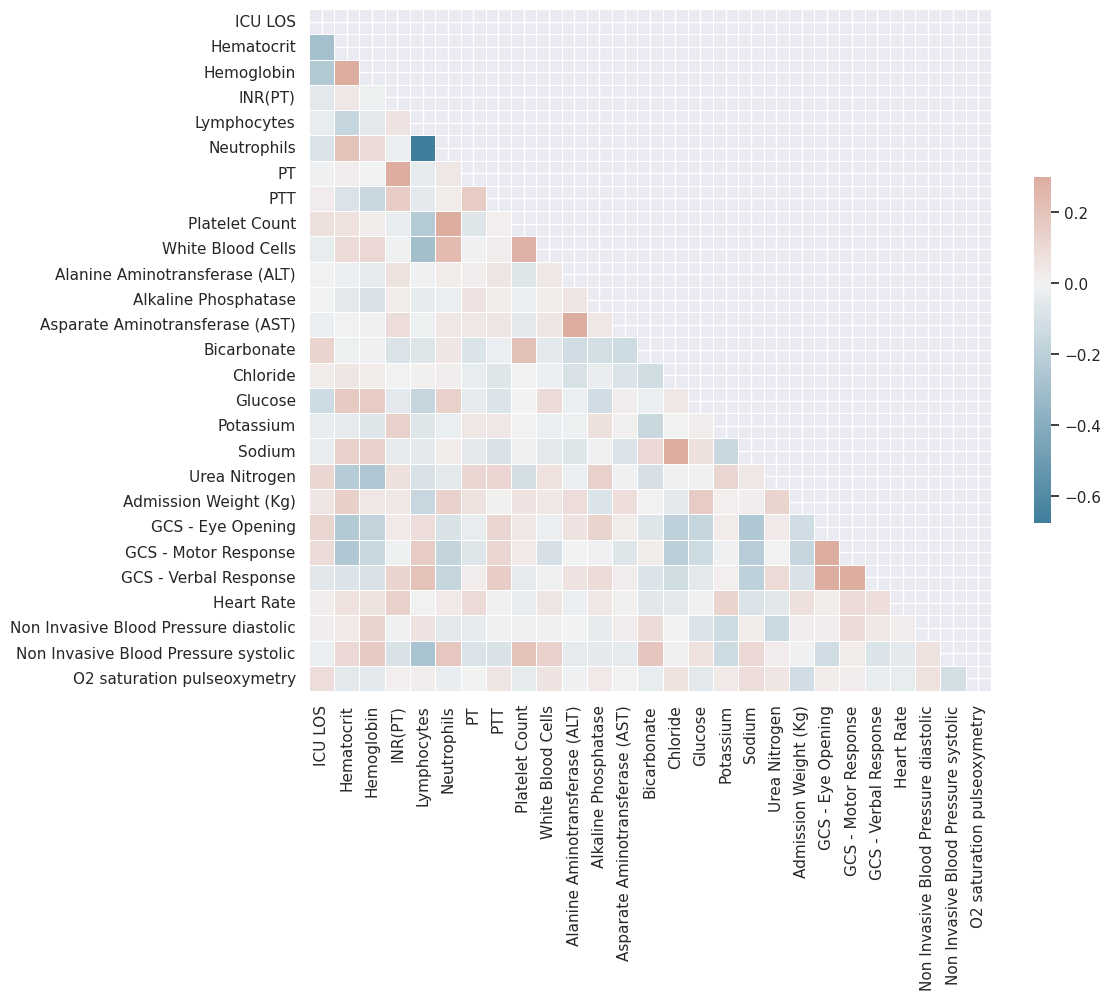

In [ ]:
# Subset the dataframe to include only the numeric columns
df_corr = df_final_alive[numeric]

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
# Get the minimum and maximum correlation values

# Replace diagonal of correlation matrix with NaN
np.fill_diagonal(corr.values, np.nan)

# Find minimum and maximum correlation
min_corr = corr.min().min()
max_corr = corr.max().max()

print("Minimum correlation: ", min_corr)
print("Maximum correlation: ", max_corr)

# Cut point for correlation at 0.9. Hence, no variable is removed

Minimum correlation:  -0.6775006556831041
Maximum correlation:  0.8757016560377539


##9.2&nbsp; LOS Distribution

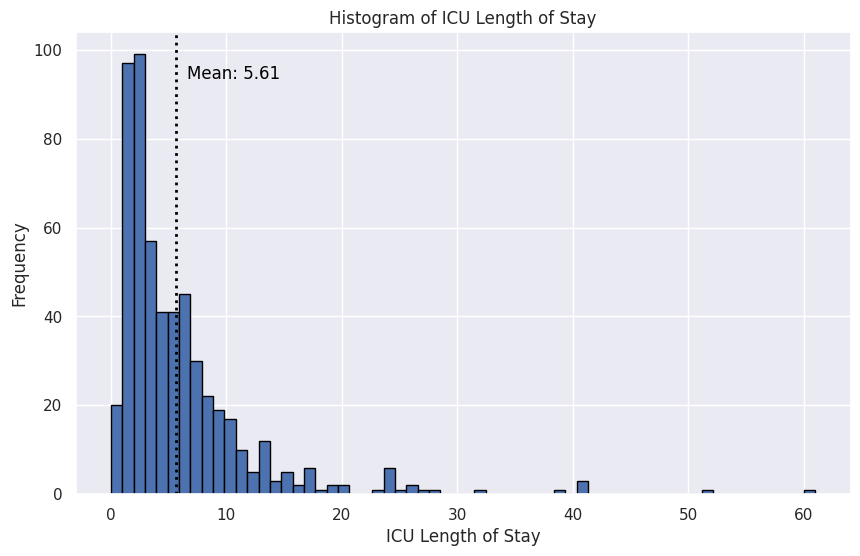

In [ ]:
# Plot the histogram
plt.figure(figsize=(10,6))
df_final_alive['ICU LOS'].hist(bins=int(df_final_alive['ICU LOS'].max() - df_final_alive['ICU LOS'].min() + 1), edgecolor='black')
plt.axvline(df_final_alive['ICU LOS'].mean(), color='black', linestyle='dotted', linewidth=2)
plt.title('Histogram of ICU Length of Stay')
plt.xlabel('ICU Length of Stay')
plt.ylabel('Frequency')

plt.text(df_final_alive['ICU LOS'].mean()+1, plt.ylim()[1]*0.9, 'Mean: {:.2f}'.format(df_final_alive['ICU LOS'].mean()), color='black')

plt.show()